### Table of contents

1. Importing libraries and data  
2. Data consistency check
3. The elbow technique
4. k-means clustering
Scatterplots  
Conclusions  
5. Descriptive statistics
Conclusions  
What could these results be useful for?

#### 1. Importing libraries and data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# Ensure the graphs are displayed in notebook
%matplotlib inline

In [3]:
# Define path
path = r'C:\Users\sandu\Desktop\WorldHappinessReport\Data\Prepared Data'
path1 =r'C:\Users\sandu\Desktop\WorldHappinessReport\Visualizations'

In [4]:
# Import data
df = pd.read_csv(os.path.join(path,'Happiness2015-2023.csv'), index_col = False)

#### 2. Data consistency check

In [5]:
df.head()

,Unnamed: 0,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,corruption_perceptions,year,happiness_rank,avg_happiness_score,happiness_category
0,0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015,1,7.493322,Happy
1,1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015,2,7.522278,Happy
2,2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015,3,7.579733,Happy
3,3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015,4,7.473889,Happy
4,4,Canada,North America and ANZ,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015,5,7.230456,Happy


In [6]:
# Check nr of rows and columns
df.shape

(1366, 14)

In [7]:
# Check for missing values
df.isnull().sum()

Unnamed: 0                      0
country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
corruption_perceptions          0
year                            0
happiness_rank                  0
avg_happiness_score             0
happiness_category              0
dtype: int64

In [8]:
# Drop coulumn 'Unnamed: 0'
df = df.drop(columns = ['Unnamed: 0'])

In [9]:
# Check column names 
df.columns

Index(['country', 'region', 'happiness_score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity', 'corruption_perceptions',
       'year', 'happiness_rank', 'avg_happiness_score', 'happiness_category'],
      dtype='object')

In [10]:
# Create a subset which contains only the 'Happiness_Score' and indicators
sub = df[['happiness_score', 'gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity', 'corruption_perceptions']]

### 3. The elbow technique

In [11]:
# Define the range of potential clusters in the data
num_cl = range(1, 10)

# Defines k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [12]:
# Create a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))] 

score

C:\Users\sandu\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sandu\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sandu\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sandu\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-2288.1376501858113,
 -906.6057577181643,
 -613.1789670877833,
 -471.2880645478216,
 -400.59838278100284,
 -367.79538212897876,
 -341.8052077840448,
 -318.2694698436925,
 -302.7365489825879]

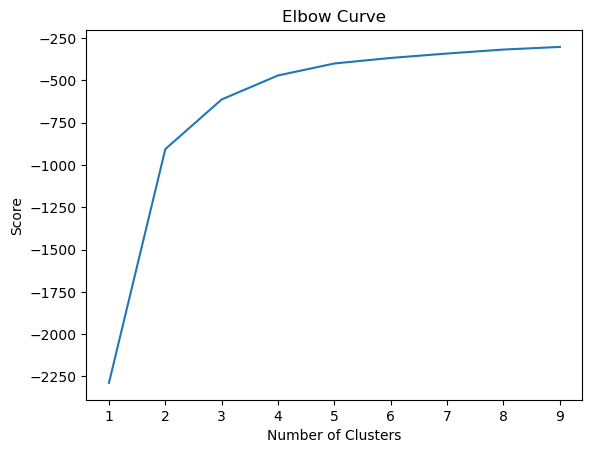

<Figure size 640x480 with 0 Axes>

In [13]:
# Plot the elbow curve
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()
plt.savefig(os.path.join(path1, 'Elbow Curve'),bbox_inches='tight', pad_inches=0.1)

The elbow (the breaking point of the curve) is where the curve begins to flatten. In this case, we can observe that it jumps from two to three on the X-axis and then increases slightly after three. That's why I believe that the optimal number of clusters is three.

### 4. K-means clustering

In [14]:
# Create the k-means object with 3 clusters
kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

TypeError: KMeans.__init__() got an unexpected keyword argument 'n_jobs'

In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(sub)  # No n_jobs parameter here

# To parallelize the fitting process
kmeans.fit(sub, n_jobs=-1)

C:\Users\sandu\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


TypeError: KMeans.fit() got an unexpected keyword argument 'n_jobs'

In [17]:
from sklearn.cluster import KMeans

# Create the KMeans object with n_clusters and n_init
kmeans = KMeans(n_clusters=3, n_init=10)

# Fit the KMeans model
kmeans.fit(sub)  # This will use parallelization automatically if you have multiple CPU cores

KMeans(n_clusters=3, n_init=10)

In [19]:
# Perform clustering using the k-means model and assign the results to new 'clusters' column
sub['clusters'] = kmeans.fit_predict(sub)

C:\Users\sandu\AppData\Local\Temp\ipykernel_2508\2278101938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['clusters'] = kmeans.fit_predict(sub)


In [21]:
sub.head()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,corruption_perceptions,clusters
0,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,1
1,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,1
2,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,1
3,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,1
4,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,1


In [22]:
# Check the frequency of each unique value in the 'clusters' column
sub['clusters'].value_counts()

clusters
0    537
2    441
1    388
Name: count, dtype: int64

#### Scatterplots

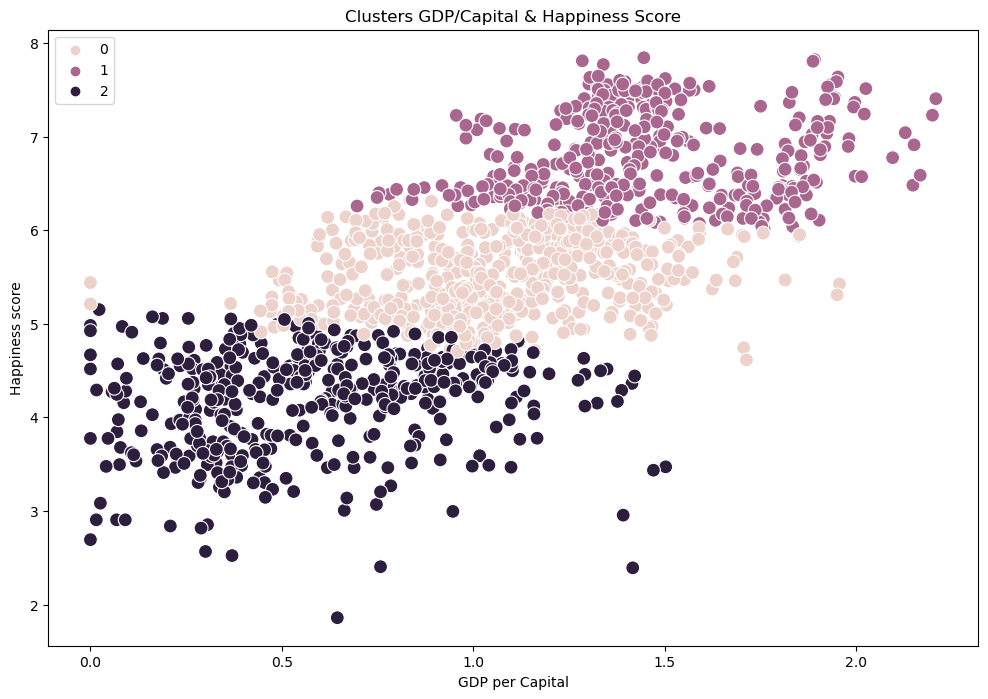

<Figure size 640x480 with 0 Axes>

In [23]:
# Plot the clusters for the "Happiness_Score" and "GDP_per_Capita" variables

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = sub['gdp_per_capita'], y = sub['happiness_score'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('GDP per Capital')
plt.ylabel('Happiness score')
plt.title('Clusters GDP/Capital & Happiness Score')
plt.show()
plt.savefig(os.path.join(path1, 'Cluster_GDPCapital'),bbox_inches='tight', pad_inches=0.1)

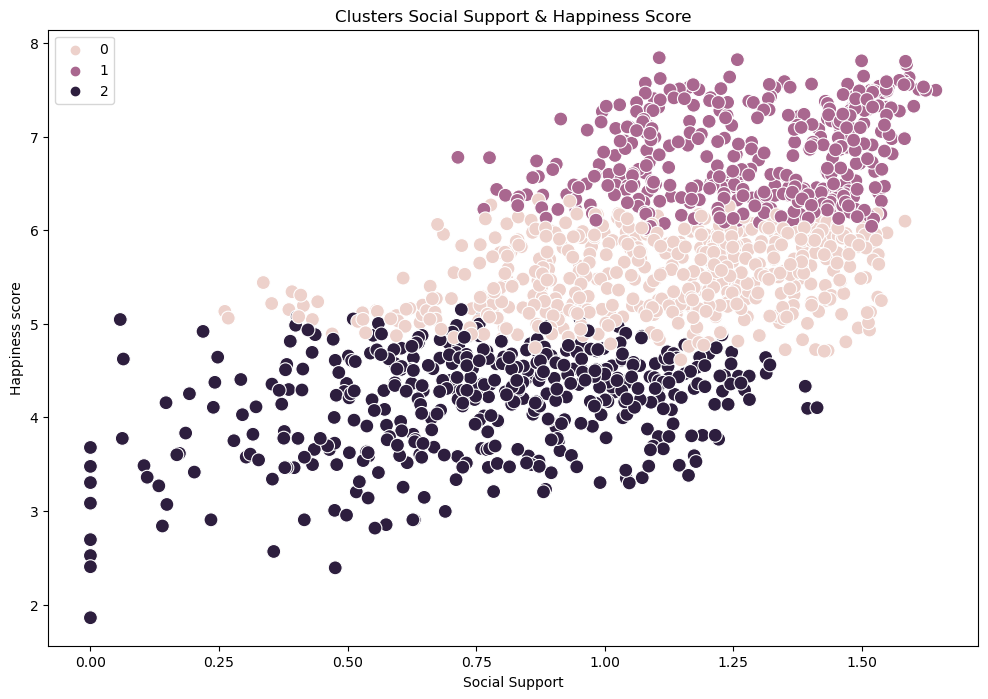

<Figure size 640x480 with 0 Axes>

In [24]:
# Plot the clusters for the "Happiness_Score" and "Social support" variables

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = sub['social_support'], y = sub['happiness_score'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Social Support')
plt.ylabel('Happiness score')
plt.title('Clusters Social Support & Happiness Score')
plt.show()
plt.savefig(os.path.join(path1, 'Cluster_SocialSupport'),bbox_inches='tight', pad_inches=0.1)

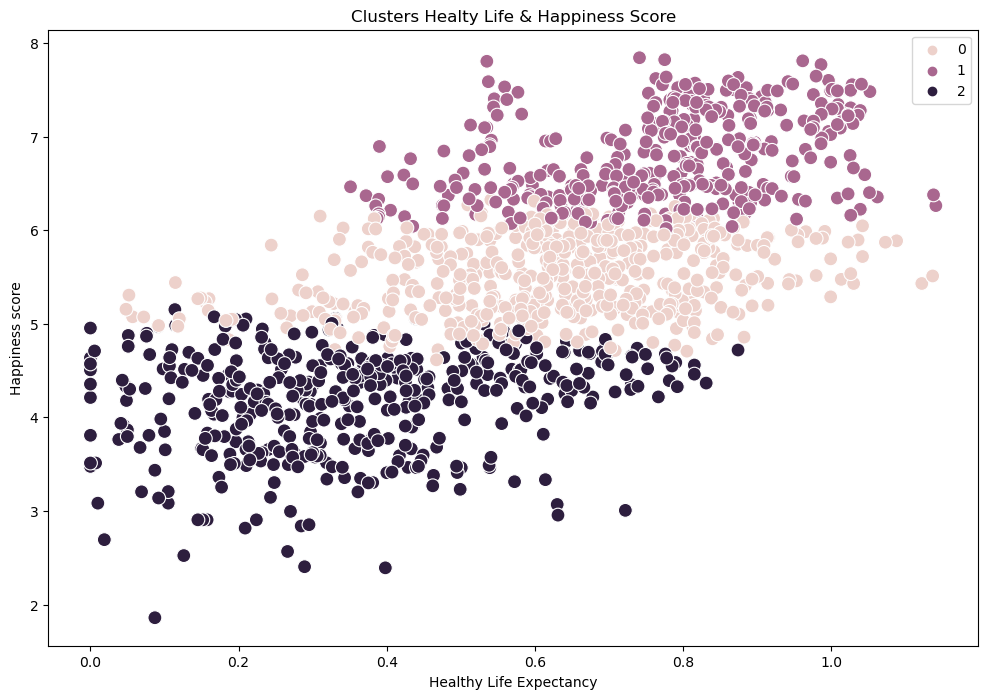

<Figure size 640x480 with 0 Axes>

In [25]:
# Plot the clusters for the "Happiness_Score" and "healthy_life_expectancy" variables.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = sub['healthy_life_expectancy'], y = sub['happiness_score'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Healthy Life Expectancy')
plt.ylabel('Happiness score')
plt.title('Clusters Healty Life & Happiness Score')
plt.show()
plt.savefig(os.path.join(path1, 'Cluster_HealthyLife'),bbox_inches='tight', pad_inches=0.1)

#### Conclusions   
The findings suggest that the purple cluster generally has the highest levels of GDP per capita, family support, health, and happiness scores, followed by the pink cluster,while the dark cluster tends to have lower levels on these indicators. These clusters represent different levels of economic development and well-being, with the purple cluster being the most prosperous and happy, and the dark cluster being the least.

### 5. Descriptive statistics

In [28]:
sub.loc[sub['clusters'] == 2, 'cluster'] = 'dark'
sub.loc[sub['clusters'] == 1, 'cluster'] = 'purple'
sub.loc[sub['clusters'] == 0, 'cluster'] = 'pink'

In [29]:
sub.groupby('cluster').agg({'gdp_per_capita':['mean', 'median'], 
                         'social_support':['mean', 'median'], 
                         'healthy_life_expectancy':['mean', 'median'],
                          'happiness_score':['mean', 'median']})

gdp_per_capita           social_support           \
                  mean    median           mean   median   
cluster                                                    
dark          0.586996  0.560479       0.769540  0.78968   
pink          1.062516  1.057000       1.097677  1.14200   
purple        1.450953  1.404353       1.285677  1.31170   

        healthy_life_expectancy           happiness_score          
                           mean    median            mean  median  
cluster                                                            
dark                   0.361197  0.343000        4.171959  4.2970  
pink                   0.631742  0.639000        5.514658  5.5170  
purple                 0.771313  0.794492        6.783121  6.6955

#### Conclusions   
Based on these statistics, it appears that the Pink Cluster is the most consistent overall, as it generally has the smallest differences between the mean and median values across all indicators. The Purple Cluster exhibits slightly larger differences, indicating slightly more variability within those clusters for some indicators. The Dark Cluster is the most diverse and inconsistent.

#### What could these results be useful for?   
The inconsistency within clusters can be used for anomaly detection. If some data points within a cluster significantly deviate from the cluster's mean or median, it could signal unusual cases that require further investigation. This can prompt additional analysis and  new hypothesis
The findings can help better understand the characteristics of each cluster. 
Within the realm social or public policy, understanding cluster's differences can inform targeted investitions, interventions, or support efforts.
In the context of business and marketing, organizations can use these results to make critical decisions concerning company expansion, product development, and resource allocation.
These clusters can help to monitor changes over time. This can enable to compare whether countries or regions within each cluster improves or deterioratates in key areas such as health, family support, economic conditions, or overall happiness.

In general the results of cluster analysis can be a foundation for a wide range of applications and decision-making processes in various domains, including business, marketing, public policy, healthcare.

In [30]:
# Export data
df.to_csv(os.path.join(path, '2015-2023.csv'))
sub.to_csv(os.path.join(path, 'clusters.csv'))